# Forecasting with Seasonality and Trends
Australian monthly Unemployment data January 1990 onwards.

In [ ]:
pip install git+https://github.com/statsmodels/statsmodels

In [2]:
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from scipy.stats                            import t
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime                               import datetime
from statsmodels.tsa.stattools              import adfuller
from statsmodels.tsa.arima.model            import ARIMA

In [3]:
from google.colab import files
import io
uploaded = files.upload()

Saving ausunemp.xlsx to ausunemp.xlsx


In [5]:
sns.set_style('whitegrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [6]:
df = pd.read_excel('ausunemp.xlsx')

In [7]:
df.head()

,Month,Unemployment rate (percentage; source: ABS)
0,1990-01-01,6.7
1,1990-02-01,7.1
2,1990-03-01,6.5
3,1990-04-01,6.3
4,1990-05-01,6.5


#Setting the time index

In [8]:
df['date'] = pd.to_datetime(df['Month'])
df = df.set_index('date')
df.drop(['Month'], axis=1, inplace=True)
df.head()

,Unemployment rate (percentage; source: ABS)
date,
1990-01-01,6.7
1990-02-01,7.1
1990-03-01,6.5
1990-04-01,6.3
1990-05-01,6.5


In [9]:
#Renaming the Unemployment variable to 'Y' for simplicity
df = df.rename(columns={"Unemployment rate (percentage; source: ABS)": "Y"})

# Line Plot for the Unemployment Rate

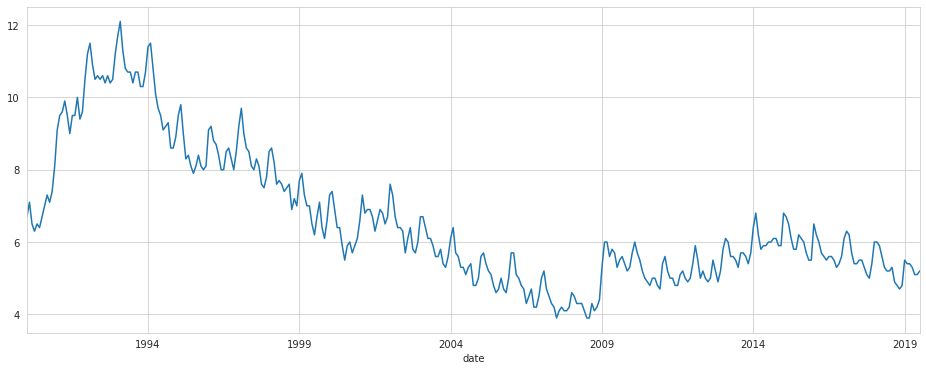

In [10]:
df['Y'].plot()
plt.show()

# Computing and visualising the moving average (MA𝚝)

In [11]:
df['MA'] = df['Y'].rolling(window=12, center=True).mean()
df['MA'].head(20)

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01    6.925000
1990-08-01    7.125000
1990-09-01    7.325000
1990-10-01    7.583333
1990-11-01    7.883333
1990-12-01    8.133333
1991-01-01    8.350000
1991-02-01    8.583333
1991-03-01    8.791667
1991-04-01    9.016667
1991-05-01    9.208333
1991-06-01    9.391667
1991-07-01    9.591667
1991-08-01    9.766667
Name: MA, dtype: float64

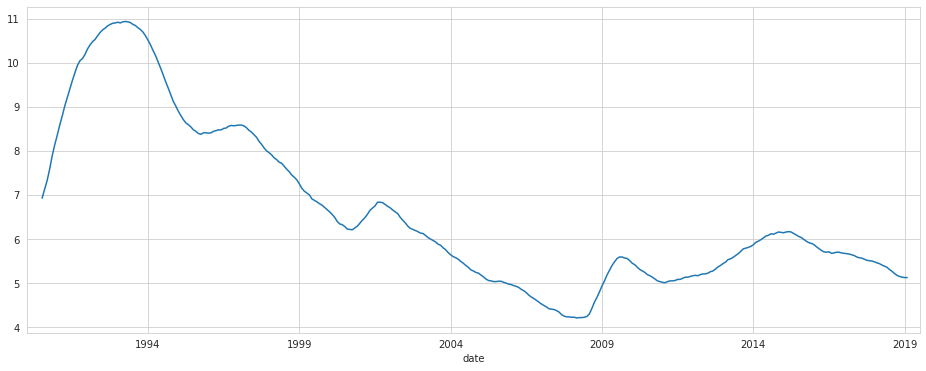

In [12]:
df['MA'].plot()
plt.show()

#Computing and visualising the centralised moving average (CMA𝚝)

In [13]:
df['CMA'] = df['MA'].rolling(window=2).mean().shift(-1)
df['CMA'].head(20)

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01    7.025000
1990-08-01    7.225000
1990-09-01    7.454167
1990-10-01    7.733333
1990-11-01    8.008333
1990-12-01    8.241667
1991-01-01    8.466667
1991-02-01    8.687500
1991-03-01    8.904167
1991-04-01    9.112500
1991-05-01    9.300000
1991-06-01    9.491667
1991-07-01    9.679167
1991-08-01    9.850000
Name: CMA, dtype: float64

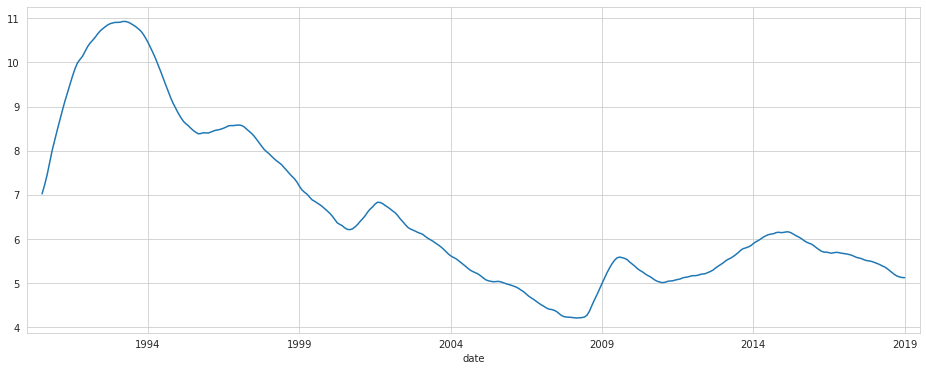

In [14]:
df['CMA'].plot()
plt.show()

#Computing and visualising  $\frac{Y_t}{\mathrm{CMA}_t}$

In [15]:
df['Y_over_CMA'] = df['Y']/df['CMA']
df['Y_over_CMA'].head(20)

date
1990-01-01         NaN
1990-02-01         NaN
1990-03-01         NaN
1990-04-01         NaN
1990-05-01         NaN
1990-06-01         NaN
1990-07-01    0.953737
1990-08-01    0.968858
1990-09-01    0.979318
1990-10-01    0.918103
1990-11-01    0.924037
1990-12-01    0.982811
1991-01-01    1.074803
1991-02-01    1.093525
1991-03-01    1.078147
1991-04-01    1.086420
1991-05-01    1.021505
1991-06-01    0.948200
1991-07-01    0.981489
1991-08-01    0.964467
Name: Y_over_CMA, dtype: float64

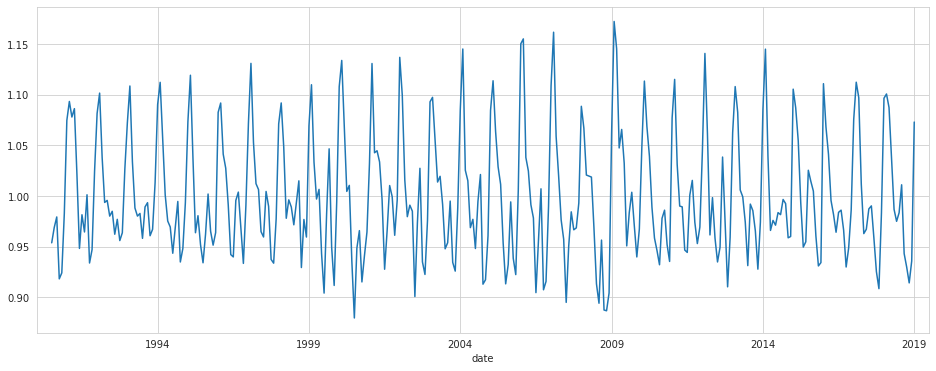

In [16]:
df['Y_over_CMA'].plot()
plt.show()

#Adding 60 time periods for prediction

In [17]:
L = 59 
i = 0
while i<=L:
    i += 1
    last_date = df.index[-1] + pd.DateOffset(months=1)
    df.loc[last_date] = np.nan
    
df.tail(60)


,Y,MA,CMA,Y_over_CMA
date,,,,
2019-08-01,NaN,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN,NaN
2019-12-01,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN
2020-03-01,NaN,NaN,NaN,NaN
2020-04-01,NaN,NaN,NaN,NaN


# Constructing month dummy variables

In [18]:
names = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

for i, x in enumerate(names):
    df[x] = (df.index.get_level_values(0).month == i+1).astype(int)

df.head()

,Y,MA,CMA,Y_over_CMA,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
date,,,,,,,,,,,,,,,,
1990-01-01,6.7,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0
1990-02-01,7.1,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0
1990-03-01,6.5,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0
1990-04-01,6.3,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0
1990-05-01,6.5,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0


# Regressing  $\frac{Y_t}{\mathrm{CMA}_t}$ on the constructed month dummy variables

In [20]:
model = sm.OLS(df['Y_over_CMA'], df[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']],missing = 'drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Y_over_CMA   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     135.0
Date:                Fri, 05 Nov 2021   Prob (F-statistic):          3.77e-115
Time:                        10:02:07   Log-Likelihood:                 769.83
No. Observations:                 343   AIC:                            -1516.
Df Residuals:                     331   BIC:                            -1470.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m1             1.0835      0.005    223.489      0.0

#Computing and visualising $\overline{SN}_t$ 

In [21]:
df['snbar'] = results.predict(df[['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']])
df['snbar'].head(20)

date
1990-01-01    1.083478
1990-02-01    1.115468
1990-03-01    1.054478
1990-04-01    1.008868
1990-05-01    0.995486
1990-06-01    0.968487
1990-07-01    0.945879
1990-08-01    0.972493
1990-09-01    0.995027
1990-10-01    0.946789
1990-11-01    0.936576
1990-12-01    0.976200
1991-01-01    1.083478
1991-02-01    1.115468
1991-03-01    1.054478
1991-04-01    1.008868
1991-05-01    0.995486
1991-06-01    0.968487
1991-07-01    0.945879
1991-08-01    0.972493
Name: snbar, dtype: float64

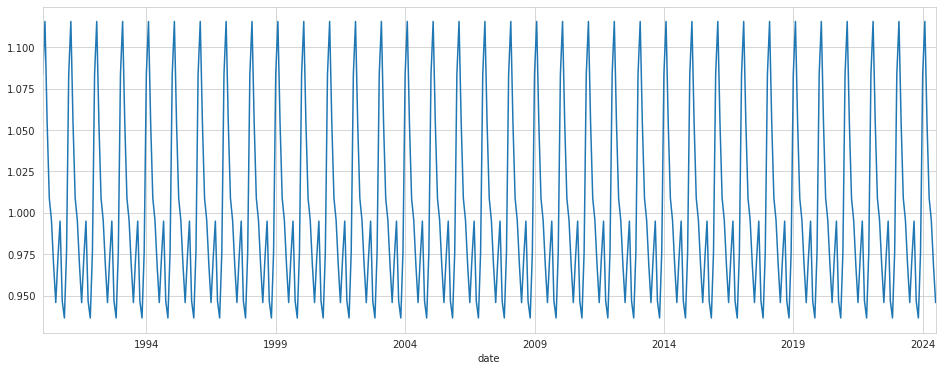

In [22]:
df['snbar'].plot()
plt.show()

In [26]:
df1 = df.head(12)
df1.head(12)

,Y,MA,CMA,Y_over_CMA,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,snbar
date,,,,,,,,,,,,,,,,,
1990-01-01,6.7,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1.083478
1990-02-01,7.1,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1.115468
1990-03-01,6.5,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1.054478
1990-04-01,6.3,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,1.008868
1990-05-01,6.5,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0.995486
1990-06-01,6.4,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0.968487
1990-07-01,6.7,6.925000,7.025000,0.953737,0,0,0,0,0,0,1,0,0,0,0,0,0.945879
1990-08-01,7.0,7.125000,7.225000,0.968858,0,0,0,0,0,0,0,1,0,0,0,0,0.972493
1990-09-01,7.3,7.325000,7.454167,0.979318,0,0,0,0,0,0,0,0,1,0,0,0,0.995027


In [28]:
#Finding and using the mean value of SNbar for simplicity
df1['snbar'].mean()

0.9999358564198789

In [29]:
df['sn'] = df['snbar']/df1['snbar'].mean()
df['sn'].head(20)

date
1990-01-01    1.083548
1990-02-01    1.115540
1990-03-01    1.054545
1990-04-01    1.008933
1990-05-01    0.995550
1990-06-01    0.968549
1990-07-01    0.945940
1990-08-01    0.972555
1990-09-01    0.995091
1990-10-01    0.946850
1990-11-01    0.936636
1990-12-01    0.976263
1991-01-01    1.083548
1991-02-01    1.115540
1991-03-01    1.054545
1991-04-01    1.008933
1991-05-01    0.995550
1991-06-01    0.968549
1991-07-01    0.945940
1991-08-01    0.972555
Name: sn, dtype: float64

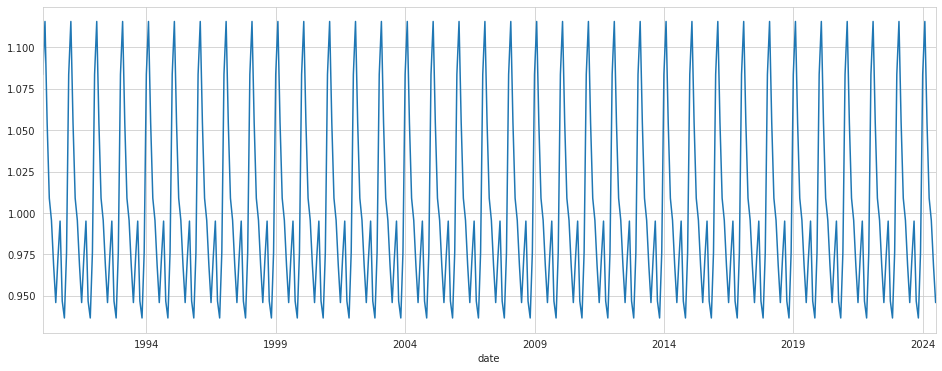

In [30]:
df['sn'].plot()
plt.show()

#Computing and plotting the deseasonalized signal $d_t$ .

In [31]:
df['d']=df['Y']/df['sn']
df['d'].head(20)

date
1990-01-01     6.183393
1990-02-01     6.364631
1990-03-01     6.163795
1990-04-01     6.244222
1990-05-01     6.529056
1990-06-01     6.607821
1990-07-01     7.082902
1990-08-01     7.197534
1990-09-01     7.336013
1990-10-01     7.498546
1990-11-01     7.900614
1990-12-01     8.296944
1991-01-01     8.398339
1991-02-01     8.516055
1991-03-01     9.103451
1991-04-01     9.812348
1991-05-01     9.542467
1991-06-01     9.292248
1991-07-01    10.042921
1991-08-01     9.768081
Name: d, dtype: float64

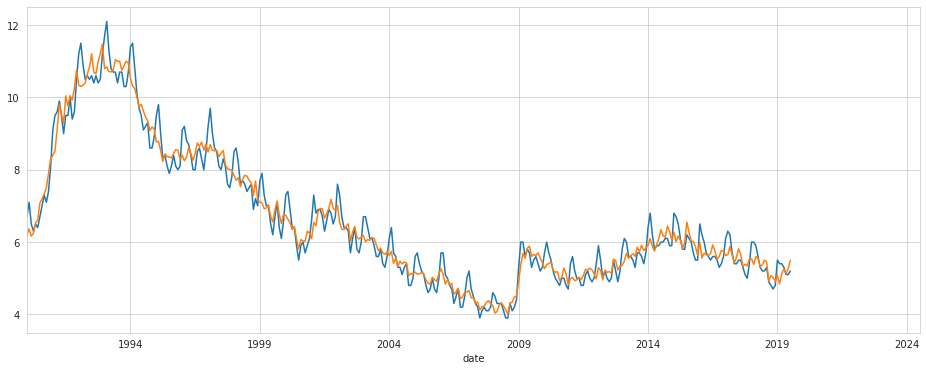

In [32]:
df['Y'].plot()
df['d'].plot()
plt.show()

#Detrending the data

In [33]:
df['t'] = np.arange(len(df))
df['t2'] = np.power(df['t'],2)
df['t3'] = np.power(df['t'],3)
df['t4'] = np.power(df['t'],4)

df[['t','t2','t3','t4']].head(5)

,t,t2,t3,t4
date,,,,
1990-01-01,0,0,0,0
1990-02-01,1,1,1,1
1990-03-01,2,4,8,16
1990-04-01,3,9,27,81
1990-05-01,4,16,64,256


In [34]:
X = df[['t','t2','t3','t4']]
X = sm.add_constant(X)

model1= sm.OLS(df['d'], X, missing='drop')
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     770.7
Date:                Fri, 05 Nov 2021   Prob (F-statistic):          4.73e-172
Time:                        10:30:13   Log-Likelihood:                -314.48
No. Observations:                 355   AIC:                             639.0
Df Residuals:                     350   BIC:                             658.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7027      0.154     49.948      0.0

#Calculating and visualising the trend signal $\mathrm{TR}_t$

In [35]:
df['tr'] = results1.predict(X)
df['tr'].head(10)

date
1990-01-01    7.702673
1990-02-01    7.805880
1990-03-01    7.905907
1990-04-01    8.002795
1990-05-01    8.096585
1990-06-01    8.187317
1990-07-01    8.275032
1990-08-01    8.359770
1990-09-01    8.441571
1990-10-01    8.520475
Name: tr, dtype: float64

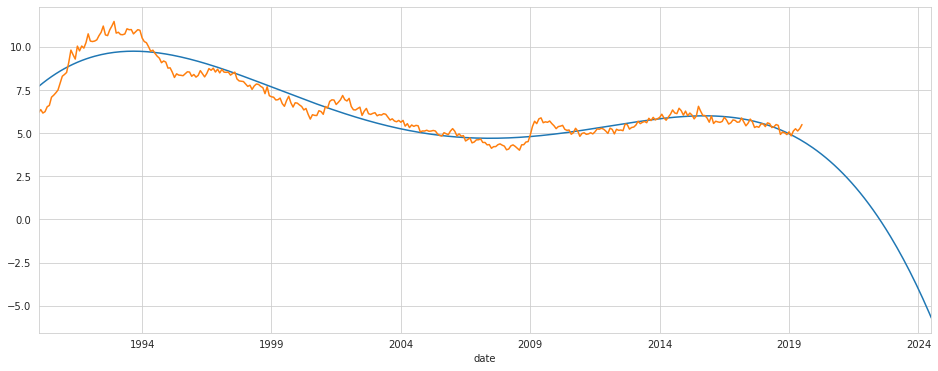

In [36]:
df['tr'].plot()
df['d'].plot()
plt.show()

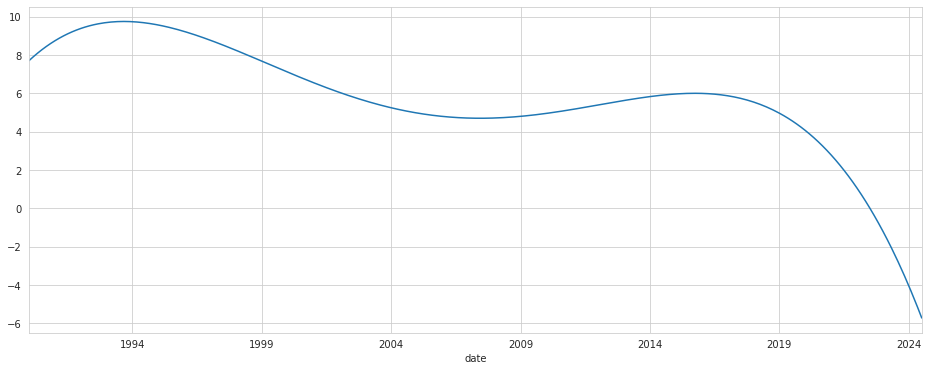

In [37]:
df['tr'].plot()
plt.show()

#Calculating and visualising  $\mathrm{TR}_t \cdot \mathrm{SN}_t$

In [38]:
df['trsn'] = df['tr'] * df['sn']
df['trsn'].head(10)

date
1990-01-01    8.346212
1990-02-01    8.707771
1990-03-01    8.337136
1990-04-01    8.074282
1990-05-01    8.060553
1990-06-01    7.929819
1990-07-01    7.827683
1990-08-01    8.130339
1990-09-01    8.400131
1990-10-01    8.067614
Name: trsn, dtype: float64

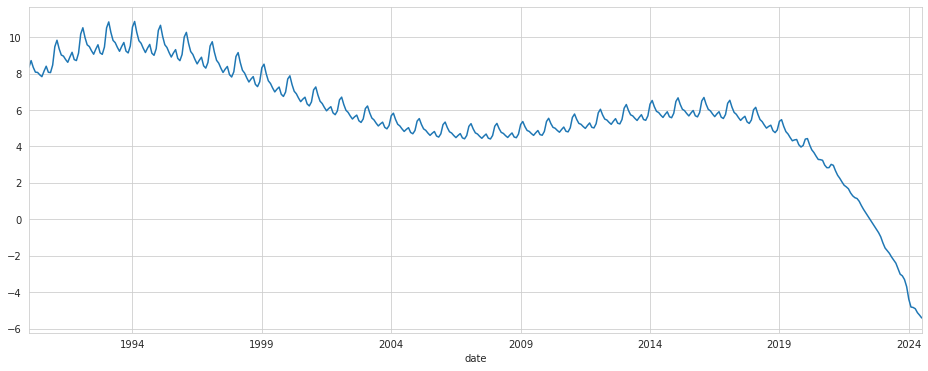

In [39]:
df['trsn'].plot()
plt.show()

#Constructing the prediction interval of $\mathrm{TR}_t$



*   *prstd* --> prediction standard error for in-sample data
*   *iv_l* and *iv_u* are the in-sample lower and upper bounds for the prediction interval



In [40]:
prstd, iv_l, iv_u= wls_prediction_std(results1)

In [42]:
x_new  = X[-60:]
x_mat  = X[:355]

sigma2_est = sum(results1.resid**2) / (len(x_mat) - 5)

# Calculating the prediction SE:
y_pred_se = np.linalg.inv(np.dot(np.transpose(x_mat), x_mat))
y_pred_se = np.dot(np.dot(x_new, y_pred_se), np.transpose(x_new))
y_pred_se = np.identity(len(x_new)) + y_pred_se
y_pred_se = sigma2_est * y_pred_se
y_pred_se = np.sqrt(np.diag(y_pred_se))

**Prediction Standard Error for Out-Of-Sample Data**

In [43]:
y_pred_se

array([0.61212472, 0.61357199, 0.61511018, 0.61674329, 0.61847541,
       0.62031071, 0.62225344, 0.62430793, 0.62647859, 0.62876989,
       0.63118638, 0.63373265, 0.63641337, 0.63923324, 0.64219701,
       0.64530947, 0.64857545, 0.65199979, 0.65558736, 0.65934303,
       0.66327169, 0.66737823, 0.6716675 , 0.67614438, 0.68081369,
       0.68568025, 0.69074882, 0.69602413, 0.70151086, 0.70721365,
       0.71313705, 0.71928557, 0.72566365, 0.73227563, 0.73912581,
       0.74621838, 0.75355746, 0.76114706, 0.76899113, 0.77709351,
       0.78545795, 0.79408811, 0.80298755, 0.81215973, 0.82160803,
       0.83133572, 0.841346  , 0.85164195, 0.86222659, 0.87310283,
       0.88427351, 0.89574138, 0.90750912, 0.91957932, 0.9319545 ,
       0.94463713, 0.95762959, 0.97093421, 0.98455325, 0.99848893])

#Combining the in-sample and out-of-sample prediction standard error to construct the Prediction Intervals for  $\mathrm{TR}_t$ and $\mathrm{TR}_t \cdot \mathrm{SN}_t$ .

In [44]:
prstd, iv_l, iv_u= wls_prediction_std(results1)
df['se'] = np.concatenate((prstd,y_pred_se))
df['tr_lo_95'] = df['tr'] - t.ppf(0.975, 350) * df['se']
df['tr_hi_95'] = df['tr'] + t.ppf(0.975, 350) * df['se']
df['trsn_lo_95'] = df['trsn'] - t.ppf(0.975, 350) * df['se']
df['trsn_hi_95'] = df['trsn'] + t.ppf(0.975, 350) * df['se']

In [45]:
df[['se','tr_lo_95','tr_hi_95', 'trsn_lo_95','trsn_hi_95']].head(10)

,se,tr_lo_95,tr_hi_95,trsn_lo_95,trsn_hi_95
date,,,,,
1990-01-01,0.610764,6.501442,8.903903,7.144982,9.547442
1990-02-01,0.609487,6.607161,9.004598,7.509052,9.906489
1990-03-01,0.608290,6.709544,9.102270,7.140773,9.533499
1990-04-01,0.607168,6.808638,9.196952,6.880125,9.268439
1990-05-01,0.606119,6.904491,9.288678,6.868459,9.252646
1990-06-01,0.605138,6.997152,9.377482,6.739654,9.119984
1990-07-01,0.604224,7.086666,9.463398,6.639317,9.016049
1990-08-01,0.603371,7.173081,9.546459,6.943650,9.317028
1990-09-01,0.602578,7.256442,9.626700,7.215002,9.585260


#Visualising 

1.   Deseasoned data
2.   $\mathrm{TR}_t$
3.   In-Sample Prediction Interval



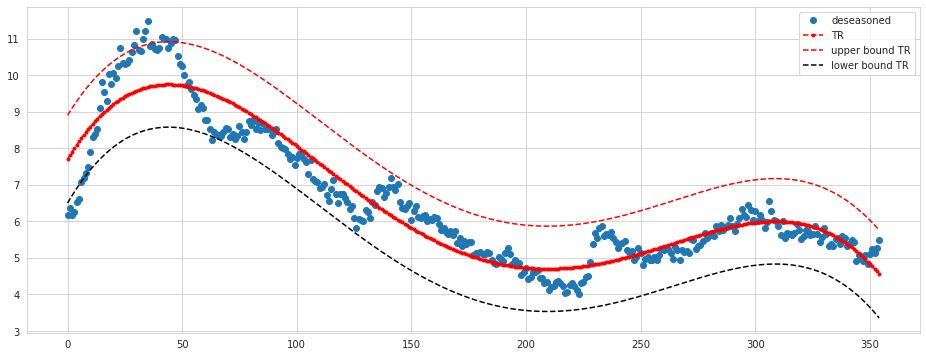

In [46]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'][:355], df['d'][:355], 'o', label="deseasoned")
ax.plot(df['t'][:355], results1.fittedvalues, 'r--.', label="TR")
ax.plot(df['t'][:355], iv_u, 'r--', label="upper bound TR")
ax.plot(df['t'][:355], iv_l, 'k--', label="lower bound TR")
ax.legend(loc='best');

#Visualising 

1.   Deseasoned data
2.   $\mathrm{TR}_t$
3.   In-Sample and Out-of-Sample Prediction Intervals for  $\mathrm{TR}_t$ as well as $\mathrm{TR}_t \cdot \mathrm{SN}_t $

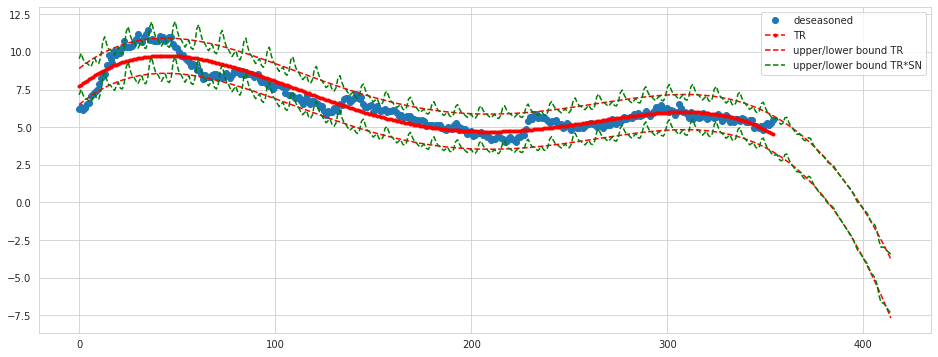

In [47]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'][:355], df['d'][:355], 'o', label="deseasoned")
ax.plot(df['t'][:355], results1.fittedvalues, 'r--.', label="TR")
ax.plot(df['t'], df['tr_hi_95'], 'r--', label="upper/lower bound TR")
ax.plot(df['t'], df['tr_lo_95'], 'r--')
ax.plot(df['t'], df['trsn_hi_95'], 'g--', label="upper/lower bound TR*SN")
ax.plot(df['t'], df['trsn_lo_95'], 'g--')
ax.legend(loc='best');

#Calculating the irregular cycle  $\mathrm{CL}_t \cdot \mathrm{IR}_t$

In [48]:
df['clir'] = df['d'] / df['tr']
df['clir'].head(10)

date
1990-01-01    0.802759
1990-02-01    0.815364
1990-03-01    0.779644
1990-04-01    0.780255
1990-05-01    0.806396
1990-06-01    0.807080
1990-07-01    0.855937
1990-08-01    0.860973
1990-09-01    0.869034
1990-10-01    0.880062
Name: clir, dtype: float64

#Calculating the Moving Average(MA) of  $\mathrm{CL}_t \cdot \mathrm{IR}_t$ to average out  $\mathrm{IR}_t$

In [49]:
df['cl']      = df['clir'].rolling(window=3, center=True).mean()
df['cl'][0]   = (2*df['clir'][0]   + df['clir'][1]  )/3
df['cl'][354] = (2*df['clir'][354] + df['clir'][353])/3
df['cl'].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


date
1990-01-01    0.806961
1990-02-01    0.799256
1990-03-01    0.791754
1990-04-01    0.788765
1990-05-01    0.797911
1990-06-01    0.823138
1990-07-01    0.841330
1990-08-01    0.861981
1990-09-01    0.870023
1990-10-01    0.889381
Name: cl, dtype: float64

#Replacing Nan of $\mathrm{CL}_t$ with 1

In [50]:
df['cl'].iloc[-60:] = 1
df['cl'].tail(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


date
2023-10-01    1.0
2023-11-01    1.0
2023-12-01    1.0
2024-01-01    1.0
2024-02-01    1.0
2024-03-01    1.0
2024-04-01    1.0
2024-05-01    1.0
2024-06-01    1.0
2024-07-01    1.0
Name: cl, dtype: float64

Visualising $\mathrm{CL}_t$ 

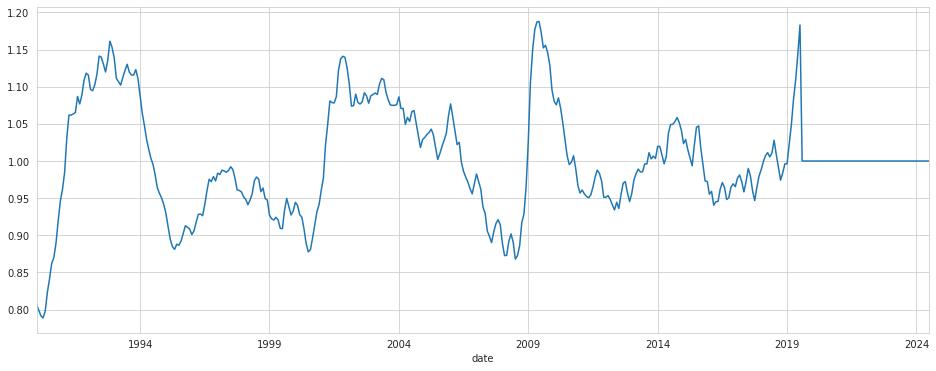

In [51]:
df['cl'].plot()
plt.show()

#Calculating and visualising  $\mathrm{IR}_t$

In [52]:
df['ir'] =df['clir']/df['cl']
df['ir'].tail(10)

date
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
2024-01-01   NaN
2024-02-01   NaN
2024-03-01   NaN
2024-04-01   NaN
2024-05-01   NaN
2024-06-01   NaN
2024-07-01   NaN
Name: ir, dtype: float64

In [53]:
df['trsncl']= df['trsn'] * df['cl']
df['trsncl'].tail(10)

date
2023-10-01   -3.094451
2023-11-01   -3.297893
2023-12-01   -3.688778
2024-01-01   -4.378196
2024-02-01   -4.805167
2024-03-01   -4.828890
2024-04-01   -4.898957
2024-05-01   -5.114055
2024-06-01   -5.252605
2024-07-01   -5.405470
Name: trsncl, dtype: float64

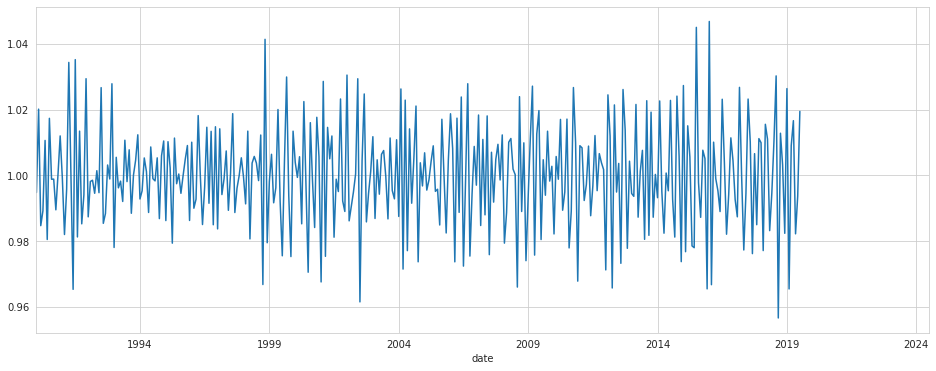

In [54]:
df['ir'].plot()
plt.show()

#Closing the loop – Visualising everything in-sample together

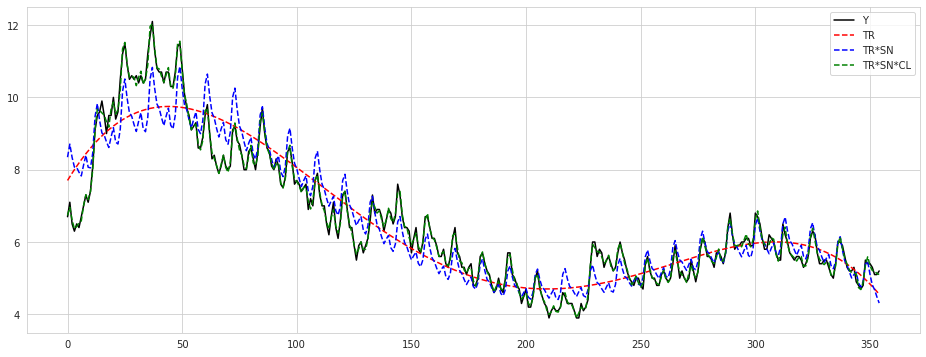

In [55]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'][:355], df['Y'][:355]     , 'k'  , label="Y")
ax.plot(df['t'][:355], df['tr'][:355]    , 'r--', label="TR")
ax.plot(df['t'][:355], df['trsn'][:355]  , 'b--', label="TR*SN")
ax.plot(df['t'][:355], df['trsncl'][:355], 'g--', label="TR*SN*CL")
ax.legend(loc='best');

plt.show()

#Visualising each in-sample component separately

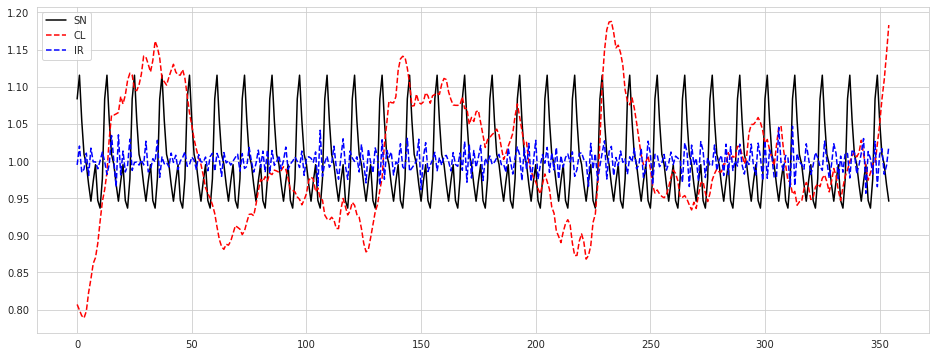

In [56]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'][:355], df['sn'][:355], 'k'  , label="SN")
ax.plot(df['t'][:355], df['cl'][:355], 'r--', label="CL")
ax.plot(df['t'][:355], df['ir'][:355], 'b--', label="IR")
ax.legend(loc='best');

plt.show()

#In-sample + out-of-sample prediction visualised

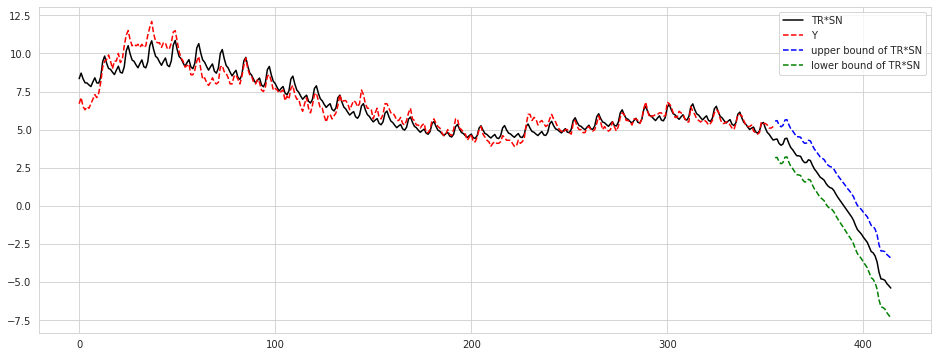

In [57]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(df['t'], df['trsn'], 'k'  , label="TR*SN")
ax.plot(df['t'], df['Y']   , 'r--', label="Y")

ax.plot(df['t'][-60:], df['trsn_hi_95'][-60:], 'b--', label="upper bound of TR*SN")
ax.plot(df['t'][-60:], df['trsn_lo_95'][-60:], 'g--', label="lower bound of TR*SN")
ax.legend(loc='best');

plt.show()